# STEP 1 : 유사도를 이용해 다람쥐 버스 정류장과 비슷한 정류장 탐색          

분류모델이나 군집을 활용해 본 결과 기존의 다람쥐 버스가 지나가는 정류장과 비슷한 특징을 보이는 정류장들을 탐색 불가능      
 
분류 모델 : 클래스가 1개 (다람쥐버스 정류장)이므로 분류 불가     
군집 모델 : 여러 군집 결과 특성을 알 수 없음.     

그래서 한 지점을 정해서 비슷한 특성을 찾을 수 있는 유사도를 활용하기로 함.      

In [3]:
import numpy as np
import pandas as pd 
from similarity import *

## 1. 데이터 전처리         

데이터 설명     
1. `daram_df` : 다람쥐 버스가 지나가는 95개의 정류장 데이터  
   `reset_daram_df` : `daram_df` 인덱스 초기화     
2. `similarity_reset_daram_df` : `reset_daram_df`를 유사도에 사용할 수 있게, 인프라 컬럼들만 추출한 데이터      
3. `label_bus_df` : 다람쥐버스정류장은 1, 일반 버스 정류장은 0으로 라벨링한 데이터     
4. `original_bus_df` : 일반 버스 정류장 데이터     
   `reset_original_bus_df` : 인덱스를 초기화한 일반 버스 정류장 데이터

### 1) 데이터 가져오기 

In [4]:
# 다람쥐 버스 정류장 데이터 
daram_df =pd.read_csv('darambus.csv', encoding='UTF-8')
# 인덱스 초기화 
reset_daram_df = daram_df.reset_index()
# 유사도에 사용할 수 있게 데이터 프레임 만들기 
similarity_reset_daram_df = reset_daram_df.loc[:,'academy_cnt':'population_15to64']
# 라벨링된 전체 데이터 가져오기
label_bus_df = pd.read_csv('bus_labels.csv', encoding='UTF-8')  


In [5]:
# 전체 데이터에서 다람쥐버스 정류장만 제거하기
original_bus_df=label_bus_df[label_bus_df['Label']==0]
# 인덱스 리셋
reset_original_bus_df= original_bus_df.reset_index()

## 다람쥐 버스 정류장과 기존 버스 정류장 전처리

### 2-1) 다람쥐 버스 정류장만 추출하기

In [6]:
# 다람쥐 버스 데이터 분할 
    # 1. 시작점과 끝점 데이터만 
start_station = [111000128,113000113,120000156,120000109,105000127,122000305,123000209]
end_station =   [111000291,118000048,119000024,120000018,105000072,122000302,123000043]

st_end_station_list = start_station + end_station

### 2-2) 다람쥐 버스가 지나가는 정류장만 추출하기 

In [7]:
st_end_daram_df=reset_daram_df[reset_daram_df['NODE_ID'].isin(st_end_station_list)]

### 3-1) 유사도에 쓰일 다람쥐 버스 정류장 (시작-종점) 데이터 프레임 만들기 : sim_st_daram_df : 95행

In [8]:
sim_st_end_daram_df=st_end_daram_df.loc[:,'academy_cnt':'population_15to64'] 

### 3-2) 유사도에 쓰일 기존 버스 정류장 데이터 프레임만들기 : sim_reset_original_bus_df : 약 12000행

In [9]:
reset_original_bus_df.head(2)

,index,Unnamed: 0,NODE_ID,정류소명,X좌표,Y좌표,법정동코드,법정동_구,법정동,academy_cnt,...,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,RIDE_SUM_6_10,ALIGHT_SUM_6_10,Label
0,0,0,100000001,종로2가사거리,126.987750,37.569765,1111013800,종로구,종로2가,185,...,68,0,10,4091,0.401961,6.382215,149,84743,52050,0
1,1,1,100000002,창경궁.서울대학교병원,126.996566,37.579183,1111016600,종로구,연건동,2,...,19,0,1,5952,0.280998,10.553191,1943,387688,712320,0


In [10]:
sim_reset_original_bus_df=reset_original_bus_df.loc[:,'academy_cnt':'population_15to64']

## 2. 유사도 이용하기 

### 2-1) 다람쥐 버스의 시작점과 끝점만 있는 정류장 : 14개   
: 유클라디안, 코사인 유사도 + 시각화 

##### eu : 유클라디안,  co : 코사인

In [11]:
# 기본 자료 정리 : 기존 데이터와 유사한 데이터를 100개 추출할 것.
num_similar = 100
df_A = sim_st_end_daram_df
df_B = sim_reset_original_bus_df

# 유클라디안 : 앞에 eu로 표시
eu_similar_st_end_data = euclidean_similar_data(df_A, df_B, num_similar)

# 코사인 : 앞에 co로 표시
co_similar_st_end_data = cosine_similar_data(df_A, df_B, num_similar)

In [12]:
co_list=co_similar_st_end_data.index.values.tolist()

In [13]:
cosine_daram_df=pd.DataFrame()
for index,rows in reset_original_bus_df.iterrows():
    
    if index in co_list:
        cosine_daram_df=pd.concat([cosine_daram_df,rows], axis=1)   

In [14]:
cosine_daram_df=cosine_daram_df.T

In [15]:
# cosine_daram_df.to_csv('cosine_similarity_daram.csv', encoding='UTF-8')

In [16]:
# 유클라디안 인덱스를 추출 
eu_similar_st_end_index = eu_similar_st_end_data.index.values
eu_similar_st_end_index_list = eu_similar_st_end_index.tolist()
# 잘뽑았나 개수 확인~
print(len(eu_similar_st_end_index_list))

# 코사인 인덱스 추출 
co_similar_st_end_index = co_similar_st_end_data.index.values
co_similar_st_end_index_list = co_similar_st_end_index.tolist()
# 잘뽑았나 개수 확인~
print(len(eu_similar_st_end_index_list))

1400
1400


In [17]:
#원하는 행만 추출 
    # 다람쥐 버스 (시작_끝)
eu_original_st_end_df=reset_original_bus_df.loc[eu_similar_st_end_index_list]
co_original_st_end_df=reset_original_bus_df.loc[co_similar_st_end_index_list]

In [18]:
# Folium에 시각화 
#visualize_similar_data_on_map('start_end_euclidean.html',eu_original_st_end_df)
#visualize_similar_data_on_map('start_end_cosine.html',co_original_st_end_df)

### 2-2) 다람쥐 버스 전체 정류장 : 95개    
: 유클라디안, 코사인 유사도 + 시각화 

In [19]:
num_similar = 30

df__A = similarity_reset_daram_df
df__B = sim_reset_original_bus_df
eu_similar_data = euclidean_similar_data(df__A, df__B, num_similar)
co_similar_data = cosine_similar_data(df__A, df__B, num_similar)

In [20]:
# 유클라디안 인덱스를 추출 
eu_similar_index = eu_similar_data.index.values
eu_similar_index_list = eu_similar_index.tolist()

# 코사인 인덱스 추출 
co_similar_index = co_similar_data.index.values
co_similar_index_list = co_similar_index.tolist()

#원하는 행만 추출 
    # 다람쥐 버스 (시작_끝)
eu_original_df=reset_original_bus_df.loc[eu_similar_index_list]
co_original_df=reset_original_bus_df.loc[co_similar_index_list]


In [21]:
# visualize_similar_data_on_map('co_original_df.html',co_original_df)

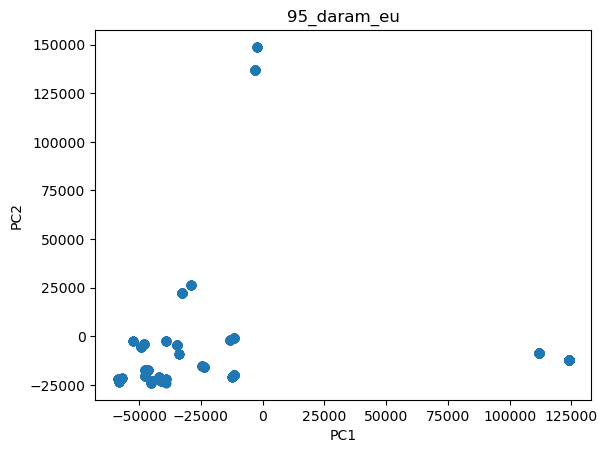

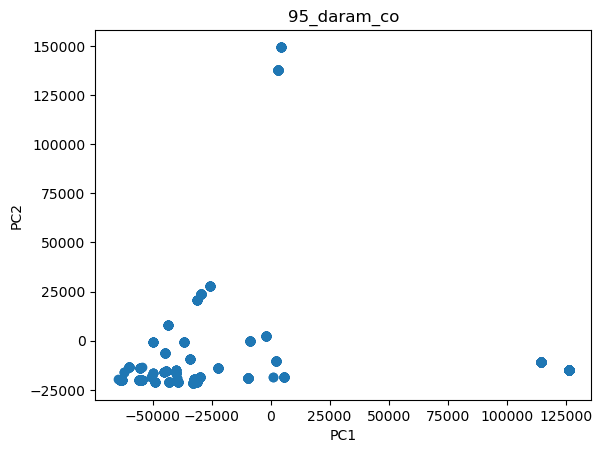

In [22]:
visualize_similar_data('95_daram_eu',eu_similar_st_end_data)
visualize_similar_data('95_daram_co',co_similar_st_end_data)

##### - 다람쥐버스 14개의 시작점,종점 정류장 데이터와 95개의 다람쥐버스 전체 정류장 데이터를 비교한 결과       

 
FOlium에서14개의 데이터의 코사인 유사도가 유클라디안 유사도보다 더 기존의 정류장들과 일치하면서 새로운 정류장까지 더 잘 찾아내는 경향을 보임 .   
  
유사도를 활용했을 때 14개 데이터가 95개 데이터보다 기존의 정류장들과 일치하면서 새로운 정류장까지 더 잘 찾아내는 경향을 보임 .     


### 번외        
유사도를 활용할 때 ,승하차 데이터가 인프라데이터에 비해 얼마나 영향을 미치는지 알아본다 .   
인프라와 승하차가 같이 포함되어 있는 데이터와 , 승하차만 있는 데이터를 활용한다. 

#### 번외1 : RIDE, ALIGHT를 포함한 데이터 만들기 

In [23]:
sim_st_end_daram_df.head()

,academy_cnt,kindergarten_cnt,mart_cnt,restaurant_cnt,school_cnt,university_cnt,subway_cnt,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64
5,42,10,1,333,1,0,1,2,49,55,0,0,4,18996,0.129167,3.160732,40211
6,79,17,3,277,4,0,0,1,42,27,0,0,5,36170,0.127863,3.528780,48942
15,67,9,4,559,1,0,2,10,172,77,18,0,4,57984,0.034599,15.536977,24716
25,35,24,2,292,2,0,0,1,45,45,0,0,5,7261,0.126083,2.676373,26152
29,9,9,2,227,3,0,2,1,50,32,0,0,3,27696,0.147954,8.436186,22544


In [24]:
sim_st_end_RA_df=st_end_daram_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10']
sim_original_RA_df=reset_original_bus_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10']

In [25]:
# 기본 자료 정리 
num_similar = 100
df_SE_RA_A = sim_st_end_RA_df
df_SE_RA_B = sim_original_RA_df

# 유클라디안 
eu_similar_RA_data = euclidean_similar_data(df_SE_RA_A, df_SE_RA_B, num_similar)

# 코사인 
co_similar_RA_data = cosine_similar_data(df_SE_RA_A, df_SE_RA_B, num_similar)

In [26]:
# 유클라디안 인덱스를 추출 
eu_similar_RA_index = eu_similar_RA_data.index.values
eu_similar_RA_index_list = eu_similar_RA_index.tolist()
len(eu_similar_st_end_index_list)

# 코사인 인덱스 추출 
co_similar_RA_index = co_similar_RA_data.index.values
co_similar_RA_index_list = co_similar_RA_index.tolist()
len(eu_similar_st_end_index_list)

#원하는 행만 추출 
    # 다람쥐 버스 (시작_끝)
eu_original_RA_df=reset_original_bus_df.loc[eu_similar_RA_index_list]
co_original_RA_df=reset_original_bus_df.loc[co_similar_RA_index_list]

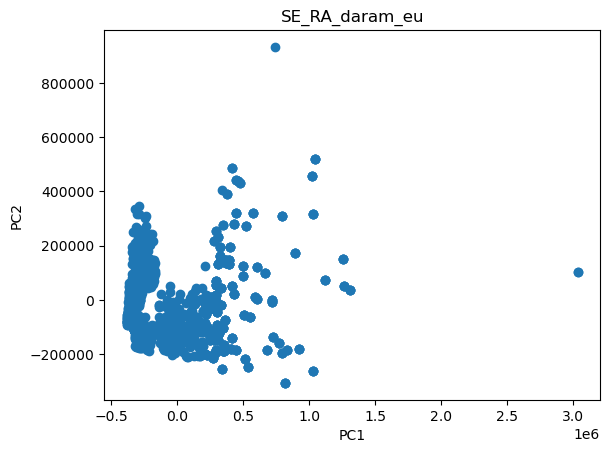

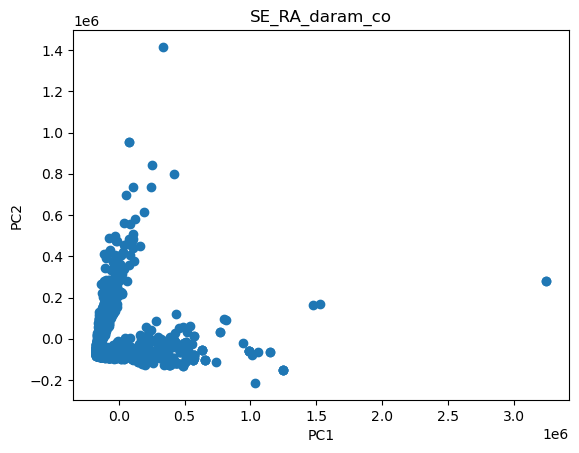

In [27]:
visualize_similar_data('SE_RA_daram_eu',eu_similar_RA_data)
visualize_similar_data('SE_RA_daram_co',co_similar_RA_data)

#### 번외2 : ONLY RIDE, ALIGHT만 있는 데이터 

In [28]:
sim_st_end_ONLY_RA_df=st_end_daram_df.loc[:,'RIDE_SUM_6_10':'ALIGHT_SUM_6_10']
sim_original_ONLY_RA_df=reset_original_bus_df.loc[:,'RIDE_SUM_6_10':'ALIGHT_SUM_6_10']

In [29]:
# 기본 자료 정리 
num_similar = 100
Only_st_end_RA = sim_st_end_ONLY_RA_df
Only_original_RA = sim_original_ONLY_RA_df

# 유클라디안 
eu_Only_RA_data = euclidean_similar_data(Only_st_end_RA, Only_original_RA, num_similar)

# 코사인 
co_Only_RA_data = cosine_similar_data(Only_st_end_RA, Only_original_RA, num_similar)

In [30]:
# 유클라디안 인덱스를 추출 
eu_Only_RA_index = eu_Only_RA_data.index.values
eu_Only_RA_index_list = eu_Only_RA_index.tolist()

# 코사인 인덱스 추출 
co_Only_RA_index = co_Only_RA_data.index.values
co_Only_RA_index_list = co_Only_RA_index.tolist()

#원하는 행만 추출 
    # 다람쥐 버스 (시작_끝)
eu_original_Only_RA_df=reset_original_bus_df.loc[eu_Only_RA_index_list]
co_original_Only_RA_df=reset_original_bus_df.loc[co_Only_RA_index_list]

In [31]:
# visualize_similar_data_on_map('ONLY_RA_daram_eu.html',eu_original_Only_RA_df)
# visualize_similar_data_on_map('ONLY_RA_daram_co.html',co_original_Only_RA_df)

In [32]:
visualize_similar_not_PCA('Only_RA_daram_eu',eu_Only_RA_data)
visualize_similar_not_PCA('Only_RA_daram_co',co_Only_RA_data)

AttributeError: module 'matplotlib' has no attribute 'scatter'

#### 번외 3 . 승하차 수가 너무 커서 산발적으로 나오니 정규화를 한 후에 해보자 (RIDE ALIGHT 포함)

##### Standard Scaling

In [33]:
sim_st_end_daram_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 5 to 94
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   academy_cnt        14 non-null     int64  
 1   kindergarten_cnt   14 non-null     int64  
 2   mart_cnt           14 non-null     int64  
 3   restaurant_cnt     14 non-null     int64  
 4   school_cnt         14 non-null     int64  
 5   university_cnt     14 non-null     int64  
 6   subway_cnt         14 non-null     int64  
 7   tour_cnt           14 non-null     int64  
 8   cafe_cnt           14 non-null     int64  
 9   hospital_cnt       14 non-null     int64  
 10  culture_cnt        14 non-null     int64  
 11  univ_hospital_cnt  14 non-null     int64  
 12  public_office_cnt  14 non-null     int64  
 13  employee_cnt       14 non-null     int64  
 14  alone_ratio        14 non-null     float64
 15  emp_corp_ratio     14 non-null     float64
 16  population_15to64  14 non-nu

In [34]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler 

std_sim_daram_df = st_end_daram_df.copy()
std_sim_original_df = reset_original_bus_df.copy()

scaler = StandardScaler()

# 스케일링 할 컬럼 뽑아내기 
std_sim_daram_column = std_sim_daram_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10'].columns
std_sim_original_column = std_sim_original_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10'].columns

# 스케일링 
std_sim_daram_df[std_sim_daram_column] = scaler.fit_transform(std_sim_daram_df[std_sim_daram_column])
std_sim_original_df[std_sim_original_column] = scaler.fit_transform(std_sim_original_df[std_sim_original_column])

In [35]:
# 기본 자료 정리 
num_similar = 100
STD_st_end_RA = std_sim_daram_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10']
STD_original_RA = std_sim_original_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10']

# 유클라디안 
eu_STD_data = euclidean_similar_data(STD_st_end_RA, STD_original_RA, num_similar)

# 코사인 
co_STD_data = cosine_similar_data(STD_st_end_RA, STD_original_RA, num_similar)

In [36]:
# 유클라디안 인덱스를 추출 
eu_STD_RA_index = eu_STD_data.index.values
eu_STD_RA_index_list = eu_STD_RA_index.tolist()

# 코사인 인덱스 추출 
co_STD_RA_index = co_STD_data.index.values
co_STD_RA_index_list = co_STD_RA_index.tolist()


#원하는 행만 추출 
    # 다람쥐 버스 (시작_끝)
#원하는 행만 추출 
    # 다람쥐 버스 (시작_끝)

eu_original_STD_RA_df=reset_original_bus_df.loc[eu_STD_RA_index_list]
co_original_STD_RA_df=reset_original_bus_df.loc[co_STD_RA_index_list]

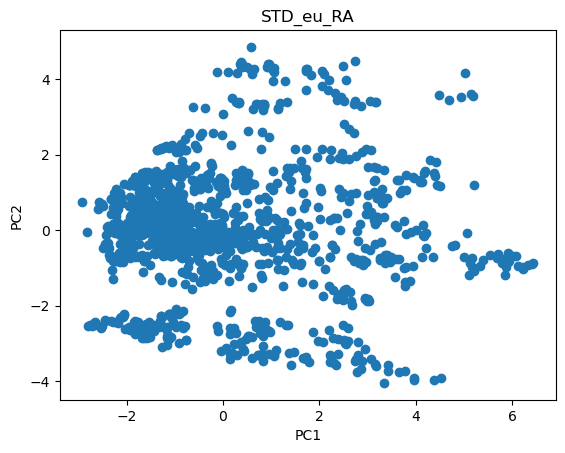

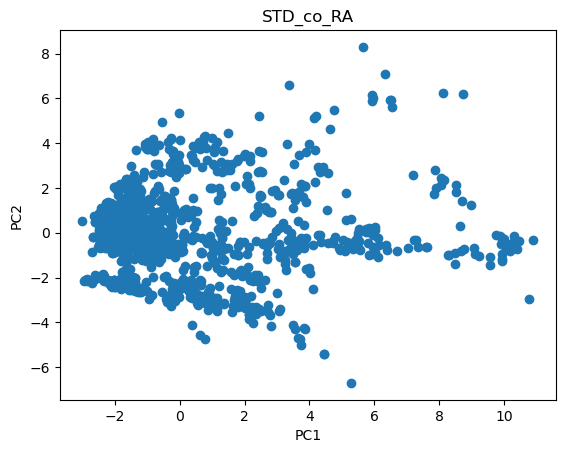

In [37]:
visualize_similar_data('STD_eu_RA',eu_STD_data)
visualize_similar_data('STD_co_RA',co_STD_data)

In [38]:
# folium을 html로 저장
# visualize_similar_data_on_map('eu_STD_RA.html',eu_original_STD_RA_df)
# visualize_similar_data_on_map('co_STD_RA.html',co_original_STD_RA_df)

#### Roust Scaling

In [39]:
from sklearn.preprocessing import RobustScaler 

rob_sim_daram_df = st_end_daram_df.copy()
rob_sim_original_df = reset_original_bus_df.copy()

robust_scaler = RobustScaler()

# 스케일링 할 컬럼 뽑아내기 
rob_sim_daram_column = rob_sim_daram_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10'].columns
rob_sim_original_column = rob_sim_original_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10'].columns

# 스케일링 
rob_sim_daram_df[rob_sim_daram_column] = robust_scaler.fit_transform(rob_sim_daram_df[rob_sim_daram_column])
rob_sim_original_df[rob_sim_original_column] = robust_scaler.fit_transform(rob_sim_original_df[rob_sim_original_column])

In [40]:
# 기본 자료 정리 
num_similar = 100
ROB_st_end_RA = rob_sim_daram_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10']
ROB_original_RA = rob_sim_original_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10']

# 유클라디안 
eu_ROB_data = euclidean_similar_data(ROB_st_end_RA, ROB_original_RA, num_similar)

# 코사인 
co_ROB_data = cosine_similar_data(ROB_st_end_RA, ROB_original_RA, num_similar)

In [41]:
# 유클라디안 인덱스를 추출 
eu_ROB_RA_index = eu_ROB_data.index.values
eu_ROB_RA_index_list = eu_ROB_RA_index.tolist()

# 코사인 인덱스 추출 
co_ROB_RA_index = co_ROB_data.index.values
co_ROB_RA_index_list = co_ROB_RA_index.tolist()


#원하는 행만 추출 
    # 다람쥐 버스 (시작_끝)

eu_original_ROB_RA_df=reset_original_bus_df.loc[eu_ROB_RA_index_list]
co_original_ROB_RA_df=reset_original_bus_df.loc[co_ROB_RA_index_list]

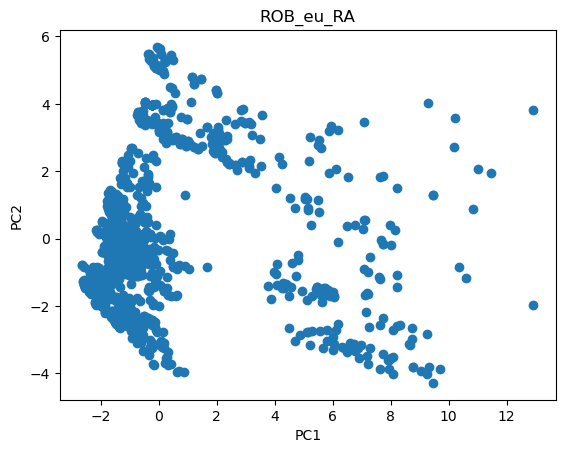

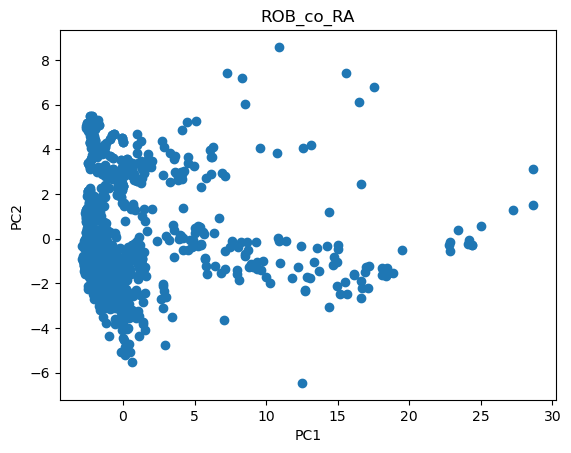

In [42]:
visualize_similar_data('ROB_eu_RA',eu_ROB_data)
visualize_similar_data('ROB_co_RA',co_ROB_data)

In [43]:
# folium을 html로 저장
# visualize_similar_data_on_map('eu_ROB_RA.html',eu_original_ROB_RA_df)
# visualize_similar_data_on_map('co_ROB_RA.html',co_original_ROB_RA_df)

### 결론 :

1. 인프라 특성만 했을 때 : 기존 다람쥐 버스 정류장과 교집합을 보이고, 특징이 비슷한 새로운 정류장도 포함 
2. 인프라 + 승하차 : 산발적이다 (다람쥐 버스 정류장의 특징을 찾아내지 못함)
3. 승하차 : 인프라 + 승하차 와 동일 
4. 승하차의 스케일링 유무와 종류에 따라서 경향을 알 수는 없다.

=> 인프라 특성이 중요하다 -> 다람쥐 버스 정류장의 인프라 특성을 알아보자 

# STEP 2: 다람쥐 버스 정류장의 특성 파악 

## 1. 다람쥐버스 (시작점-종점:14개)의 특성 파악
: st_end_daram_df

### 1) 히스토그램 그리기 

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# hist_daram_list

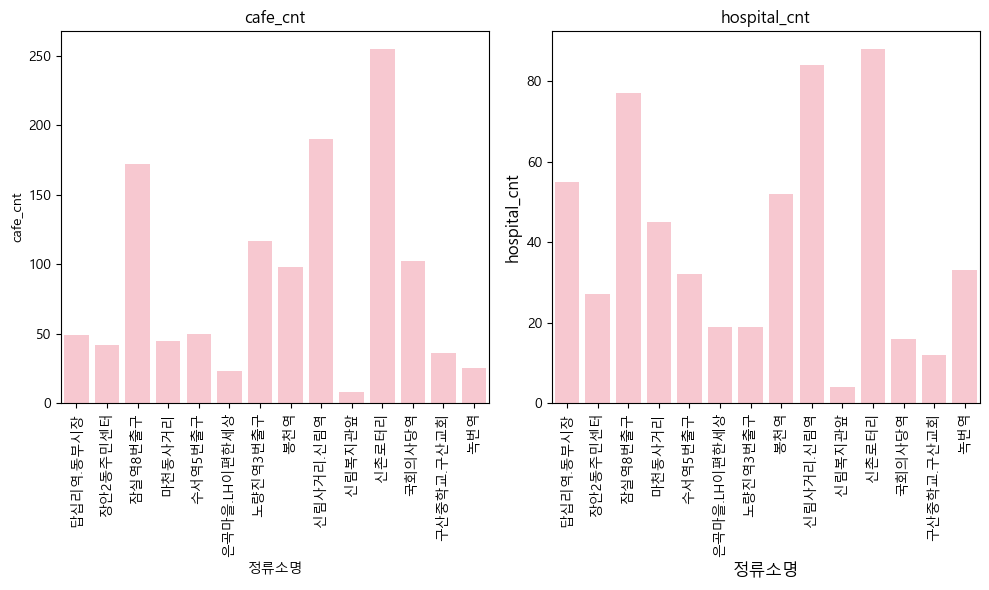

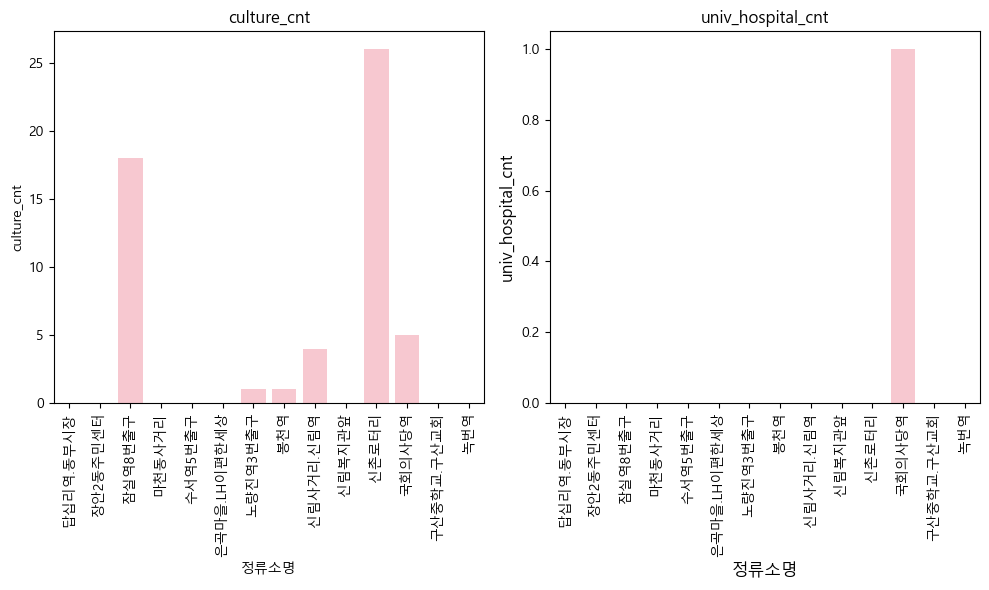

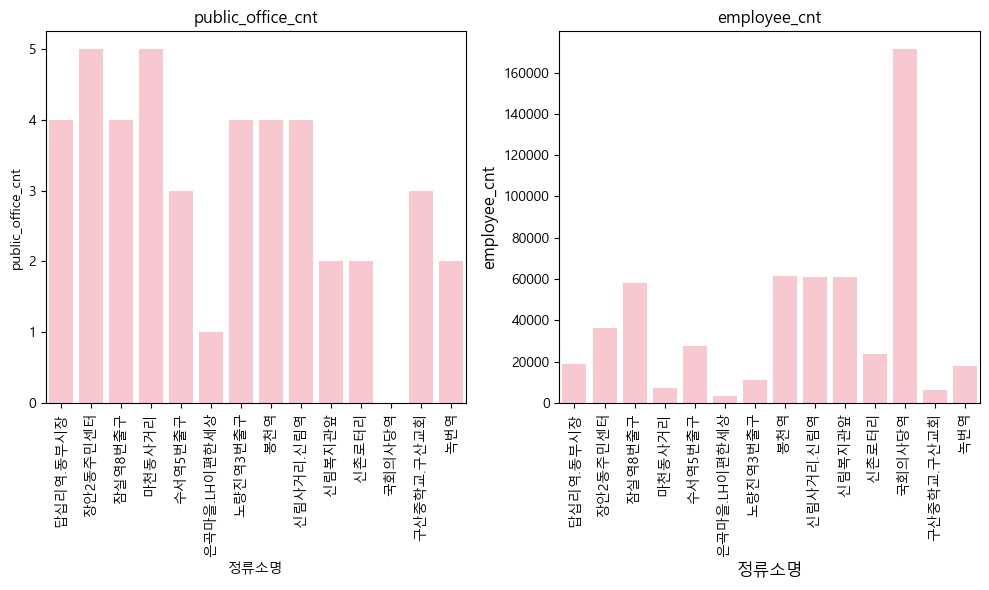

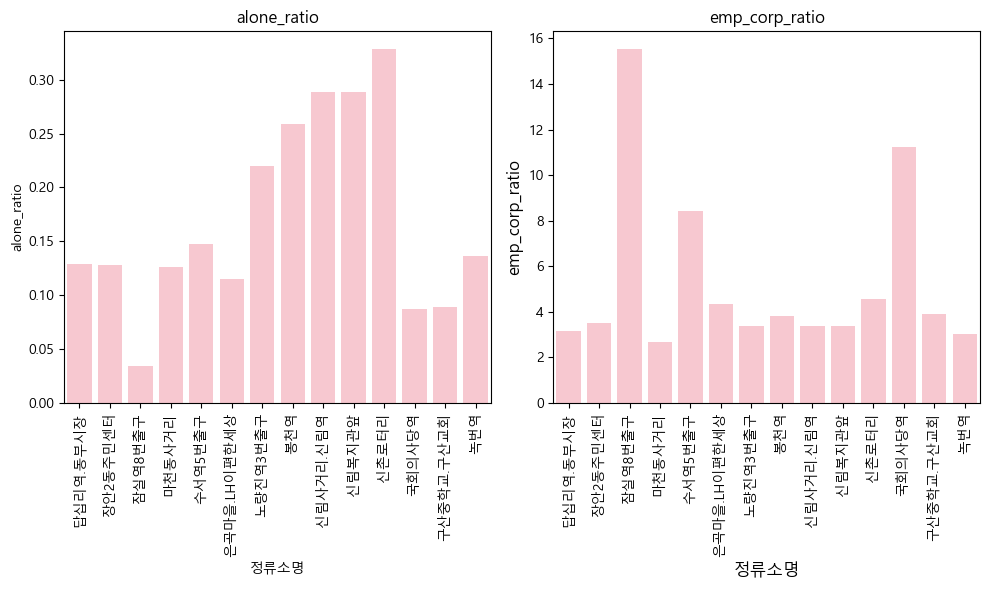

In [66]:
for i in zip(hist_daram_list[0::2], hist_daram_list[1::2]):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

    sns.barplot(data=plot_daram_14_df, x=plot_daram_14_df.index, y = i[0], color='pink', label= i[0],ax=ax1)
    ax1.set_title(i[0],fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('counts', fontsize=12)

    sns.barplot(data=plot_daram_14_df, x=plot_daram_14_df.index, y = i[1], color='pink', label= i[1],ax=ax2)
    ax2.set_title(i[1],fontsize=12)
    ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
daram_avg = plot_daram_14_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10'].mean(axis=0)
trans_daram_avg= daram_avg.transpose()
daram_mean_df = pd.DataFrame(trans_daram_avg)
daram_mean_df.rename(columns={0:'daram'}, inplace=True)

히스토그램의 수치만응로는 어떤 특성이 더 중요한지, 파악 할 수가 없음.

##### 다람쥐 버스 정류장과 기존 버스정류장의 인프라 차이를 비율로 확인      
새로운 다람쥐버스 정류장을 정하려고 할 때, 중요한 인프라가 어떤 것인지 알아보는 것이 목적.

In [ ]:
plot_original_df = reset_original_bus_df.copy()

In [ ]:
original_avg= plot_original_df.loc[:,'academy_cnt':'ALIGHT_SUM_6_10'].mean(axis=0)

trans_original_avg=original_avg.transpose()
ori_df=pd.DataFrame(trans_original_avg)
ori_df.rename(columns={0:'origin'},inplace=True)
df= pd.concat([daram_mean_df, ori_df],axis=1)
df['difference'] = daram_mean_df['daram']-ori_df['origin']
df.rename(columns={0:'daram'})
df.rename(columns={})
df['rate']= (df['daram']-df['origin'])/ df['origin']   # 기존 정류장에 비해 다람쥐 버스 정류장이 몇 퍼센트 높나
df[df['rate']>0.25]

,daram,origin,difference,rate
mart_cnt,1.857143,0.967157,0.889986,0.920209
restaurant_cnt,385.071429,264.354935,120.716494,0.456646
subway_cnt,1.000000,0.780695,0.219305,0.280909
tour_cnt,1.857143,1.277042,0.580101,0.454254
cafe_cnt,86.571429,65.078616,21.492813,0.330259
population_15to64,59613.071429,47080.735967,12532.335461,0.266188
RIDE_SUM_6_10,195506.000000,60542.044648,134963.955352,2.229260
ALIGHT_SUM_6_10,642046.857143,58633.408014,583413.449129,9.950188


### 결론 ( 숫자가 아니라 비율로 비교)
마트, 식당, 지하철, 관광지, 카페, 경제인구수, 승하차가 주요요인         
스케일링을 적용해서 기점과 종점의 인프라 특징을 분석을 해야함.     

In [ ]:
# st_end_daram_df.to_csv('다람쥐버스_기점_종점_14.csv', encoding='UTF-8')